<a href="https://colab.research.google.com/github/cwru-commlab/sdr-basic/blob/main/FM_demodulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Software FM demodulator
Started by Chat GPT, modified
25 March 2025
DK
"""


import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt




In [ ]:
def fm_demodulate(iq_data, fs, de_emphasis_tau=75e-6):
    """
    FM Demodulation using phase differentiation.
    :param iq_data: Complex I/Q samples (numpy array)
    :param fs: Sampling rate in Hz
    :param de_emphasis_tau: Time constant for de-emphasis filter in seconds (default: 75 µs for US FM broadcast radio)
    :return: Demodulated audio signal
    """
    # Compute phase difference (instantaneous frequency deviation)
    # multiplies each sample by the conjugate of the previous sample
    phase_diff = np.angle(iq_data[1:] * np.conj(iq_data[:-1]))

    # Prepend zero to match original signal length
    fm_demodulated = np.hstack(([0], phase_diff))

    # De-emphasis filter (1st order low-pass filter)
    alpha = np.exp(-1 / (fs * de_emphasis_tau))
    b, a = [1 - alpha], [1, -alpha]
    audio_signal = signal.lfilter(b, a, fm_demodulated)

    return audio_signal


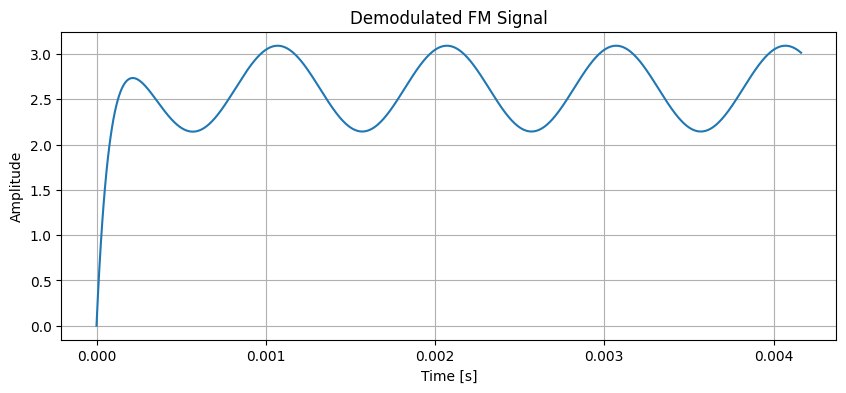

In [ ]:
# Example Usage
if __name__ == "__main__":
    # Simulated FM signal for testing
    fs = 240000  # 240 kHz sample rate
    t = np.arange(0, 0.1, 1/fs)  # 100 ms of signal
    f_carrier = 100e3  # 100 kHz carrier
    f_mod = 1e3  # 1 kHz tone
    modulation_index = 20.0  # Frequency deviation scaling

    # Generate FM-modulated signal
    phase = 2 * np.pi * f_carrier * t + modulation_index * np.sin(2 * np.pi * f_mod * t)
    iq_data = np.exp(1j * phase)  # I/Q signal

    # Demodulate
    audio_out = fm_demodulate(iq_data, fs)

    # Plot result
    plt.figure(figsize=(10, 4))
    plt.plot(t[:1000], audio_out[:1000])  # Plot first few ms
    plt.title("Demodulated FM Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
